In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from factor_analyzer import calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('dataset/kline.csv', sep=';')
df.shape

(630691, 15)

In [3]:
df.head()

open_time     open     high      low    close     volume  \
0  1577836800000  0.19285  0.19297  0.19219  0.19248  1339147.7   
1  1577840400000  0.19243  0.19372  0.19237  0.19371  2339976.0   
2  1577844000000  0.19371  0.19454  0.19325  0.19418  2275718.8   
3  1577847600000  0.19419  0.19427  0.19371  0.19397   972145.7   
4  1577851200000  0.19397  0.19410  0.19351  0.19363  1176061.9   

      close_time   quote_volume  count  taker_buy_volume  \
0  1577840399999  257925.439502   1278          479957.5   
1  1577843999999  452060.925165   2249         1453722.0   
2  1577847599999  441494.831939   1509         1552864.6   
3  1577851199999  188606.109345   1066          480068.8   
4  1577854799999  227937.280398   1077          770127.9   

   taker_buy_quote_volume  ignore ticker        open_datetime  \
0            92429.917586       0    XRP  2020-01-01 00:00:00   
1           280854.952488       0    XRP  2020-01-01 01:00:00   
2           301337.420868       0    XRP  2020-01-01 02:00:00   
3            93134.098773       0    XRP  2020-01-01 03:00:00   
4           149272.489365       0    XRP  2020-01-01 04:00:00   

            close_datetime  
0  2020-01-01 00:59:59.999  
1  2020-01-01 01:59:59.999  
2  2020-01-01 02:59:59.999  
3  2020-01-01 03:59:59.999  
4  2020-01-01 04:59:59.999

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630691 entries, 0 to 630690
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   open_time               630691 non-null  int64  
 1   open                    630691 non-null  float64
 2   high                    630691 non-null  float64
 3   low                     630691 non-null  float64
 4   close                   630691 non-null  float64
 5   volume                  630691 non-null  float64
 6   close_time              630691 non-null  int64  
 7   quote_volume            630691 non-null  float64
 8   count                   630691 non-null  int64  
 9   taker_buy_volume        630691 non-null  float64
 10  taker_buy_quote_volume  630691 non-null  float64
 11  ignore                  630691 non-null  int64  
 12  ticker                  630691 non-null  object 
 13  open_datetime           630691 non-null  object 
 14  close_datetime      

In [5]:
df = df.drop(['ignore'], axis=1)
df['open_datetime'] = pd.to_datetime(df['open_datetime'])
df['close_datetime'] = pd.to_datetime(df['close_datetime'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630691 entries, 0 to 630690
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   open_time               630691 non-null  int64         
 1   open                    630691 non-null  float64       
 2   high                    630691 non-null  float64       
 3   low                     630691 non-null  float64       
 4   close                   630691 non-null  float64       
 5   volume                  630691 non-null  float64       
 6   close_time              630691 non-null  int64         
 7   quote_volume            630691 non-null  float64       
 8   count                   630691 non-null  int64         
 9   taker_buy_volume        630691 non-null  float64       
 10  taker_buy_quote_volume  630691 non-null  float64       
 11  ticker                  630691 non-null  object        
 12  open_datetime           630691

In [7]:
numcols = [
    'open',
    'high',
    'low',
    'close',
    'volume', 
    'quote_volume',            
    'count',                   
    'taker_buy_volume',        
    'taker_buy_quote_volume'
]

In [8]:
df['ticker'].unique()

array(['XRP', 'ETH', 'DOT', 'SHIB', 'BTC', 'XLM', 'LINK', 'AVAX', 'SOL',
       'MATIC', 'FET', 'GRT', 'LTC', 'UNI', 'DOGE', 'NEAR', 'CHZ', 'ADA',
       'BCH', 'APE'], dtype=object)

In [9]:
# tickers = df['ticker'].unique()
# fig, axes = plt.subplots(nrows=len(tickers), ncols=len(numcols), figsize=(5*len(numcols), 5*len(tickers)))
# for i, ticker in enumerate(tickers):
#     df_ticker = df.loc[df['ticker'] == ticker, :]
#     for j, col in enumerate(numcols):
#         sns.histplot(df_ticker[col], bins=20, color='blue', alpha=0.5, kde=True, ax=axes[i, j])
#         axes[i, j].set_title('Histograma de ' + ticker)
#         axes[i, j].set_xlabel(col)
#         axes[i, j].set_ylabel('Frecuencia')
# plt.show()

In [10]:
def evalute_normal_dist(df):
    results = []
    for col in df.columns:
        hip = ss.shapiro(df[col])
        results.append((col, hip))
    print("Distribución normal")
    for result in results:
        print(result[0], " -> ", result[1][1])

In [11]:
evalute_normal_dist(df[numcols])

c:\Users\Cesar\Documents\Develop\visual\ml-tf\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 630691.
  res = hypotest_fun_out(*samples, **kwds)


Distribución normal
open  ->  1.865490960932312e-219
high  ->  1.857653199335122e-219
low  ->  1.8737676504650448e-219
close  ->  1.8662387304255473e-219
volume  ->  1.2431114009524455e-228
quote_volume  ->  3.164934415878298e-217
count  ->  1.0811457803458647e-214
taker_buy_volume  ->  1.1359714782078428e-228
taker_buy_quote_volume  ->  2.7974937255563544e-217


In [12]:
df_corr = df[numcols].corr(method='spearman')

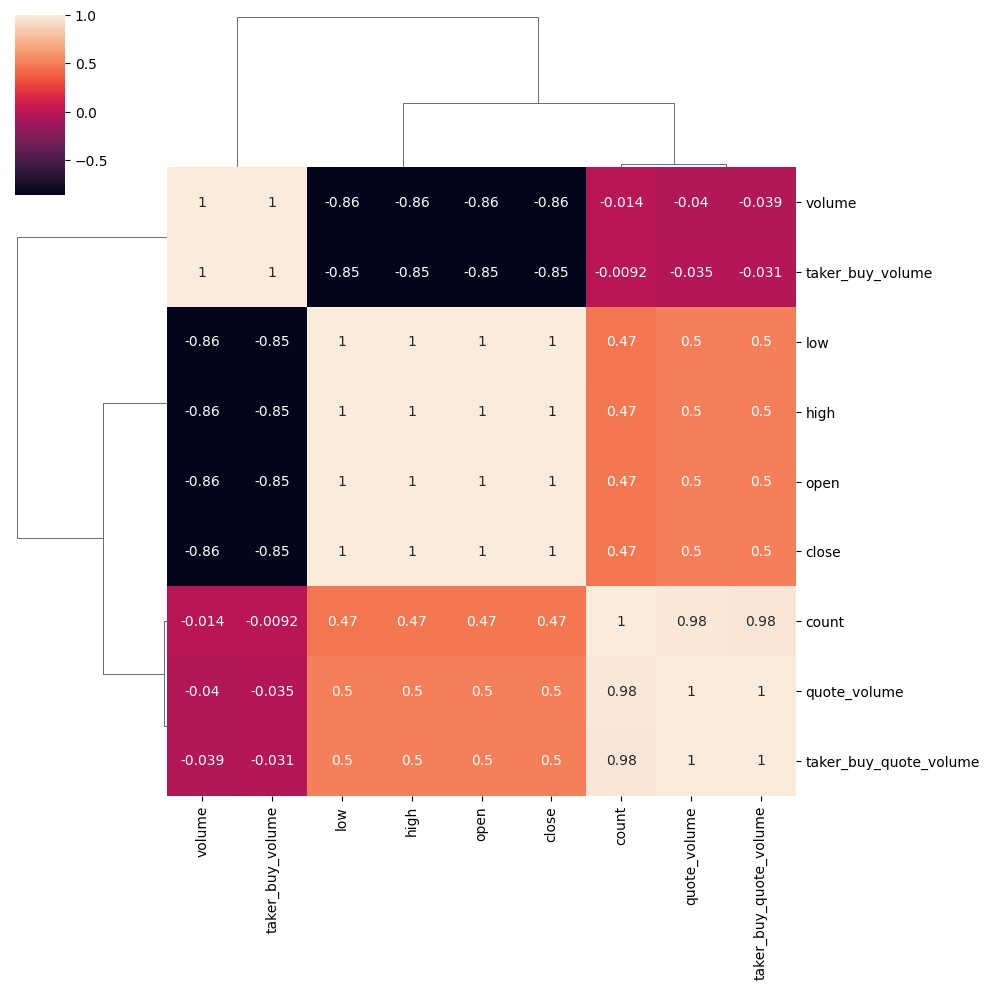

In [13]:
sns.clustermap(df_corr, annot=True)

In [14]:
from itertools import combinations
def evalute_corr(df):
    results = []
    for col1, col2 in combinations(df.columns, 2):
        res = ss.spearmanr(df[col1], df[col2])
        results.append((col1, col2, res))
    print("Distribución normal")
    for result in results:
        print(f"{result[0]}|{result[1]} -> p-value={result[2][1]}, corr={result[2][0]}")

In [15]:
evalute_corr(df[numcols])

Distribución normal
open|high -> p-value=0.0, corr=0.9999905098707279
open|low -> p-value=0.0, corr=0.9999902113128445
open|close -> p-value=0.0, corr=0.9999896063593514
open|volume -> p-value=0.0, corr=-0.8560181638136343
open|quote_volume -> p-value=0.0, corr=0.5026039847236755
open|count -> p-value=0.0, corr=0.4707337188222369
open|taker_buy_volume -> p-value=0.0, corr=-0.851547647467148
open|taker_buy_quote_volume -> p-value=0.0, corr=0.500861004239295
high|low -> p-value=0.0, corr=0.9999810516495883
high|close -> p-value=0.0, corr=0.9999938872549362
high|volume -> p-value=0.0, corr=-0.8555865616892879
high|quote_volume -> p-value=0.0, corr=0.503341607335637
high|count -> p-value=0.0, corr=0.4716045244130756
high|taker_buy_volume -> p-value=0.0, corr=-0.8510801149477497
high|taker_buy_quote_volume -> p-value=0.0, corr=0.5016488294146234
low|close -> p-value=0.0, corr=0.9999902542744785
low|volume -> p-value=0.0, corr=-0.8564726674522058
low|quote_volume -> p-value=0.0, corr=0.50183

## Análisis de Componentes Principales (PCA)

### PCA: price

In [16]:
pca_cols = ['open', 'low', 'high', 'close']
#pca_cols = ['open', 'low', 'high', 'close', 'volume', 'taker_buy_volume']
chi_square_value, p_value = calculate_bartlett_sphericity(df[pca_cols])
print(f"value={chi_square_value}, p-value={p_value}")

value=19903317.633998383, p-value=0.0


In [17]:
df_standard = StandardScaler().fit_transform(df[pca_cols])
pca_model = PCA().fit(df_standard)
components = [f'PC{i + 1}' for i in range(len(pca_cols))]

[9.99981872e-01 9.93034441e-06 7.10714126e-06 1.09042175e-06]
[0.99998187 0.9999918  0.99999891 1.        ]


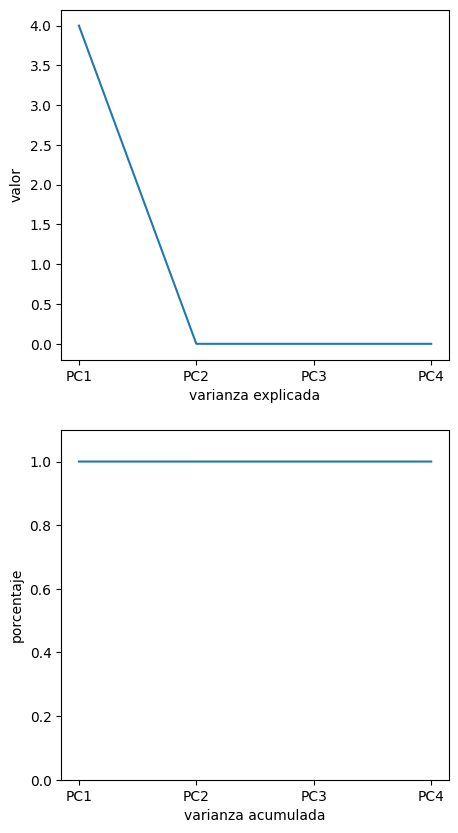

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))
print(pca_model.explained_variance_ratio_)
axes[0].plot(components, pca_model.explained_variance_)
axes[0].set_xlabel('varianza explicada')
axes[0].set_ylabel('valor')

sumcum = np.cumsum(pca_model.explained_variance_ratio_)
print(sumcum)
axes[1].plot(components, sumcum)
axes[1].set_xlabel('varianza acumulada')
axes[1].set_ylabel('porcentaje')
plt.ylim(0, 1.1)
plt.show()

Conservaremos únicamente el primer componente

In [19]:
df['PC_price'] = pca_model.transform(df_standard)[:, 0]
#df_pc = pca_model.transform(df_standard)
#df['PC_price1'] = df_pc[:, 0]
#df['PC_price2'] = df_pc[:, 1]

df = df.drop(pca_cols, axis=1)
df.head()

open_time     volume     close_time   quote_volume  count  \
0  1577836800000  1339147.7  1577840399999  257925.439502   1278   
1  1577840400000  2339976.0  1577843999999  452060.925165   2249   
2  1577844000000  2275718.8  1577847599999  441494.831939   1509   
3  1577847600000   972145.7  1577851199999  188606.109345   1066   
4  1577851200000  1176061.9  1577854799999  227937.280398   1077   

   taker_buy_volume  taker_buy_quote_volume ticker       open_datetime  \
0          479957.5            92429.917586    XRP 2020-01-01 00:00:00   
1         1453722.0           280854.952488    XRP 2020-01-01 01:00:00   
2         1552864.6           301337.420868    XRP 2020-01-01 02:00:00   
3          480068.8            93134.098773    XRP 2020-01-01 03:00:00   
4          770127.9           149272.489365    XRP 2020-01-01 04:00:00   

           close_datetime  PC_price  
0 2020-01-01 00:59:59.999 -0.460841  
1 2020-01-01 01:59:59.999 -0.460841  
2 2020-01-01 02:59:59.999 -0.460841  
3 2020-01-01 03:59:59.999 -0.460841  
4 2020-01-01 04:59:59.999 -0.460841

### PCA: quote

In [20]:
pca_cols = ['count', 'quote_volume', 'taker_buy_quote_volume']
chi_square_value, p_value = calculate_bartlett_sphericity(df[pca_cols])
print(f"value={chi_square_value}, p-value={p_value}")

value=4528294.202298501, p-value=0.0


In [21]:
df_standard = StandardScaler().fit_transform(df[pca_cols])
pca_model = PCA().fit(df_standard)
components = [f'PC{i + 1}' for i in range(len(pca_cols))]

[9.61705357e-01 3.75126286e-02 7.82014081e-04]
[0.96170536 0.99921799 1.        ]


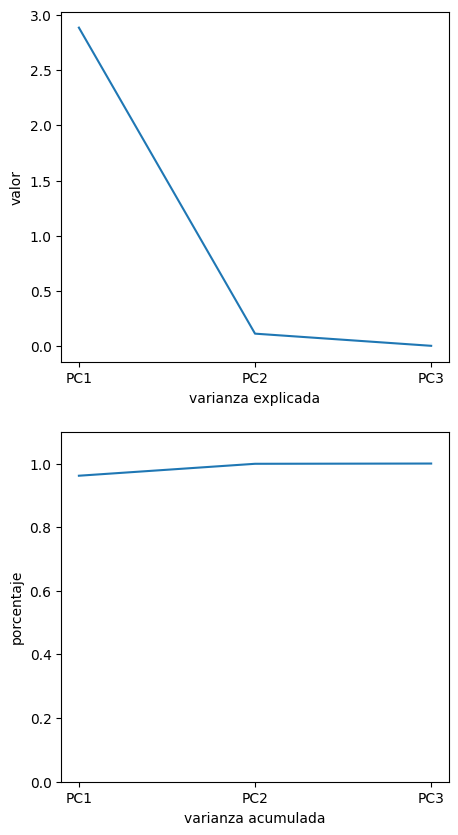

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))
print(pca_model.explained_variance_ratio_)
axes[0].plot(components, pca_model.explained_variance_)
axes[0].set_xlabel('varianza explicada')
axes[0].set_ylabel('valor')

sumcum = np.cumsum(pca_model.explained_variance_ratio_)
print(sumcum)
axes[1].plot(components, sumcum)
axes[1].set_xlabel('varianza acumulada')
axes[1].set_ylabel('porcentaje')
plt.ylim(0, 1.1)
plt.show()

Conservamos unicamente el primer componente

In [23]:
df['PC_quote'] = pca_model.transform(df_standard)[:, 0]
df = df.drop(pca_cols, axis=1)
df.head()

open_time     volume     close_time  taker_buy_volume ticker  \
0  1577836800000  1339147.7  1577840399999          479957.5    XRP   
1  1577840400000  2339976.0  1577843999999         1453722.0    XRP   
2  1577844000000  2275718.8  1577847599999         1552864.6    XRP   
3  1577847600000   972145.7  1577851199999          480068.8    XRP   
4  1577851200000  1176061.9  1577854799999          770127.9    XRP   

        open_datetime          close_datetime  PC_price  PC_quote  
0 2020-01-01 00:00:00 2020-01-01 00:59:59.999 -0.460841 -0.536331  
1 2020-01-01 01:00:00 2020-01-01 01:59:59.999 -0.460841 -0.514222  
2 2020-01-01 02:00:00 2020-01-01 02:59:59.999 -0.460841 -0.524666  
3 2020-01-01 03:00:00 2020-01-01 03:59:59.999 -0.460841 -0.540374  
4 2020-01-01 04:00:00 2020-01-01 04:59:59.999 -0.460841 -0.538127

### PCA: volume

In [24]:
pca_cols = ['volume', 'taker_buy_volume']
chi_square_value, p_value = calculate_bartlett_sphericity(df[pca_cols])
print(f"value={chi_square_value}, p-value={p_value}")

value=3385839.681587918, p-value=0.0


In [25]:
df_standard = StandardScaler().fit_transform(df[pca_cols])
pca_model = PCA().fit(df_standard)
components = [f'PC{i + 1}' for i in range(len(pca_cols))]

[0.99883334 0.00116666]
[0.99883334 1.        ]


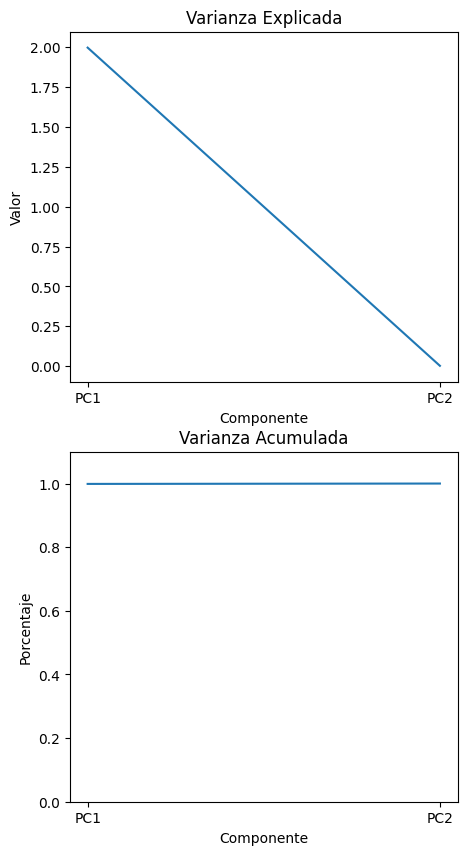

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))
print(pca_model.explained_variance_ratio_)
axes[0].plot(components, pca_model.explained_variance_)
axes[0].set_title('Varianza Explicada')
axes[0].set_xlabel('Componente')
axes[0].set_ylabel('Valor')

sumcum = np.cumsum(pca_model.explained_variance_ratio_)
print(sumcum)
axes[1].plot(components, sumcum)
axes[1].set_title('Varianza Acumulada')
axes[1].set_xlabel('Componente')
axes[1].set_ylabel('Porcentaje')
plt.ylim(0, 1.1)
plt.show()

Unicamente conservamos el primer componente

In [27]:
df['PC_volume'] = pca_model.transform(df_standard)[:, 0]
df = df.drop(pca_cols, axis=1)
df.head()

open_time     close_time ticker       open_datetime  \
0  1577836800000  1577840399999    XRP 2020-01-01 00:00:00   
1  1577840400000  1577843999999    XRP 2020-01-01 01:00:00   
2  1577844000000  1577847599999    XRP 2020-01-01 02:00:00   
3  1577847600000  1577851199999    XRP 2020-01-01 03:00:00   
4  1577851200000  1577854799999    XRP 2020-01-01 04:00:00   

           close_datetime  PC_price  PC_quote  PC_volume  
0 2020-01-01 00:59:59.999 -0.460841 -0.536331  -0.108086  
1 2020-01-01 01:59:59.999 -0.460841 -0.514222  -0.108076  
2 2020-01-01 02:59:59.999 -0.460841 -0.524666  -0.108076  
3 2020-01-01 03:59:59.999 -0.460841 -0.540374  -0.108087  
4 2020-01-01 04:59:59.999 -0.460841 -0.538127  -0.108085

### Análisis

In [28]:
df.describe()

open_time    close_time                  open_datetime  \
count  6.306910e+05  6.306910e+05                         630691   
mean   1.645779e+12  1.645782e+12  2022-02-25 08:47:00.477856768   
min    1.577837e+12  1.577840e+12            2020-01-01 00:00:00   
25%    1.617192e+12  1.617196e+12            2021-03-31 12:00:00   
50%    1.647288e+12  1.647292e+12            2022-03-14 20:00:00   
75%    1.675681e+12  1.675685e+12            2023-02-06 11:00:00   
max    1.704064e+12  1.704067e+12            2023-12-31 23:00:00   
std    3.485624e+10  3.485624e+10                            NaN   

                      close_datetime      PC_price      PC_quote     PC_volume  
count                         630691  6.306910e+05  6.306910e+05  6.306910e+05  
mean   2022-02-25 09:47:00.108677888  6.489273e-17  1.543005e-16 -1.045494e-17  
min       2020-01-01 00:59:59.999000 -4.608926e-01 -5.611760e-01 -1.080934e-01  
25%    2021-03-31 12:59:59.999000064 -4.608364e-01 -5.243201e-01 -1.080930e-01  
50%    2022-03-14 20:59:59.999000064 -4.602373e-01 -4.499080e-01 -1.080902e-01  
75%    2023-02-06 11:59:59.999000064 -4.500083e-01 -1.904753e-01 -1.080607e-01  
max       2023-12-31 23:59:59.999000  1.784699e+01  9.538734e+01  2.129937e+02  
std                              NaN  1.999983e+00  1.698564e+00  1.413389e+00

<Axes: >

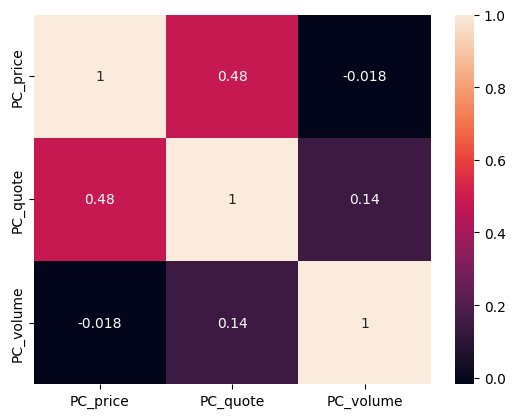

In [29]:
pc_cols = ['PC_price', 'PC_quote', 'PC_volume']
sns.heatmap(df[pc_cols].corr(), annot=True)

In [30]:
df['PC_price']

0        -0.460841
1        -0.460841
2        -0.460841
3        -0.460841
4        -0.460841
            ...   
630686   -0.460451
630687   -0.460454
630688   -0.460452
630689   -0.460458
630690   -0.460461
Name: PC_price, Length: 630691, dtype: float64

In [31]:
df.PC_volume

0        -0.108086
1        -0.108076
2        -0.108076
3        -0.108087
4        -0.108085
            ...   
630686   -0.108093
630687   -0.108092
630688   -0.108092
630689   -0.108090
630690   -0.108089
Name: PC_volume, Length: 630691, dtype: float64

## Timeline

In [32]:
def timeline_per_ticker():
    tickers = df['ticker'].unique().tolist()
    fig, axes = plt.subplots(nrows=len(tickers), ncols=4, figsize=(80, 10*len(tickers)))

    for i, ticker in enumerate(tickers):
        df_ticker = df[df['ticker'] == ticker]
        df_ticker.sort_values('open_datetime')
        standard_data = StandardScaler().fit_transform(df_ticker.loc[:, ['PC_price', 'PC_quote', 'PC_volume']])
        axes[i, 0].plot(
            df_ticker['open_datetime'], standard_data[:,0], 
            color='black', label='PC_price')#, marker='-')
        axes[i, 0].plot(
            df_ticker['open_datetime'], standard_data[:,1], 
            alpha=0.1, color='blue', label='PC_quote')#, marker='-')
        axes[i, 0].plot(
            df_ticker['open_datetime'], standard_data[:,2], 
            alpha=0.1, color='red', label='PC_volume')#, marker='-')
        axes[i, 1].plot(
            df_ticker['open_datetime'], df_ticker['PC_price'], 
            color='blue', label='PC_price')
        axes[i, 2].plot(
            df_ticker['open_datetime'], df_ticker['PC_quote'], 
            color='blue', label='PC_quote')
        axes[i, 3].plot(
            df_ticker['open_datetime'], df_ticker['PC_volume'], 
            color='blue', label='PC_volume')

        axes[i, 0].set_title(f'Evolución de {ticker}')
        axes[i, 1].set_title(f'Evolución de PC_price para {ticker}')
        axes[i, 2].set_title(f'Evolución de PC_quote para {ticker}')
        axes[i, 3].set_title(f'Evolución de PC_volume para {ticker}')
        for j in range(3):
            axes[i, j].set_xlabel('Tiempo')
            axes[i, j].set_ylabel('Valores')
            axes[i, j].set_xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-12-31'))  # Establecer la fecha de inicio y final del eje y
            axes[i, j].legend()
            axes[i, j].grid(True)

    plt.tight_layout()
    plt.show()

In [33]:
timeline_per_ticker()

In [34]:
#!pip install statsmodels pandas numpy matplotlib

In [35]:


#model = pm.auto_arima(train['value'], seasonal=False, trace=True)
#print(model.summary())
#predictions = model.predict(n_periods=len(test))

PRICE PREDICITON

In [36]:
df_XRP = df[df['ticker'] == 'XRP']

In [37]:
df.loc[df['ticker'] == 'XRP', ['open_datetime', 'PC_price']]

open_datetime  PC_price
0     2020-01-01 00:00:00 -0.460841
1     2020-01-01 01:00:00 -0.460841
2     2020-01-01 02:00:00 -0.460841
3     2020-01-01 03:00:00 -0.460841
4     2020-01-01 04:00:00 -0.460841
...                   ...       ...
35028 2023-12-31 19:00:00 -0.460727
35029 2023-12-31 20:00:00 -0.460727
35030 2023-12-31 21:00:00 -0.460727
35031 2023-12-31 22:00:00 -0.460729
35032 2023-12-31 23:00:00 -0.460729

[35033 rows x 2 columns]

In [94]:
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

def timeserie_preprocessing(df, ticker, time_col, target_col, mean_window=24):
    df_target = df.loc[df['ticker'] == ticker, [time_col, target_col]]
    df_target.columns = ['timestamp', 'target']
    df_target.sort_values('timestamp')
    df_target = df_target.set_index('timestamp')
    df_target = df_target.asfreq('h')
    if df_target.isna().sum()['target'] > 0:
        df_target['target_mean'] = df_target['target'].rolling(window=mean_window, min_periods=1).mean()
        df_target['target'] = df_target['target'].combine_first(df_target['target_mean'])
        df_target = df_target.drop('target_mean', axis=1)
    print(ticker, "missing values", df_target.isna().sum())
    return df_target

def arima_preprocessing(df, tickers):
    models = dict()
    df[['ticker', 'open_datetime', 'PC_price']]
    for ticker in tickers:
        df_ticker = df[df['ticker'] == ticker]
        df_ticker.sort_values('open_datetime')
        df_price = df_ticker[['open_datetime', 'PC_price']]
        df_price.columns = ['date', 'target']
        df_price = df_price.set_index('date')
        df_price = df_price.asfreq('H')
    
def arima(df, tickers):
    timelines_per_ticker = [(ticker, timeserie_preprocessing(df, ticker)) for ticker in df['ticker'].unique()]
    for ticker, df_timeline in timelines_per_ticker:
        pass


def timeline_train_test_split(df, size):
    div = round(df.shape[0] * size)
    train = df.iloc[:div]
    test = df.iloc[div:]
    return train, test

def timeserie_plot(df):
    plt.figure(figsize=(10, 5))

    plt.plot(
        df.index, df['target'], 
        color='blue', label='PC_quote', linewidth=0.5
        )
    plt.xlabel('Tiempo')
    plt.ylabel('Valores')
    plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-12-31'))  # Establecer la fecha de inicio y final del eje y
    plt.legend()
    plt.grid(True)
    plt.show()

In [86]:
df_timeserie = timeserie_preprocessing(df, 'XRP', 'open_datetime', 'PC_price')
df_timeserie.head(5)

XRP missing values target    0
dtype: int64


target
timestamp                    
2020-01-01 00:00:00 -0.460841
2020-01-01 01:00:00 -0.460841
2020-01-01 02:00:00 -0.460841
2020-01-01 03:00:00 -0.460841
2020-01-01 04:00:00 -0.460841

In [87]:
df_timeserie.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=35064, freq='h')

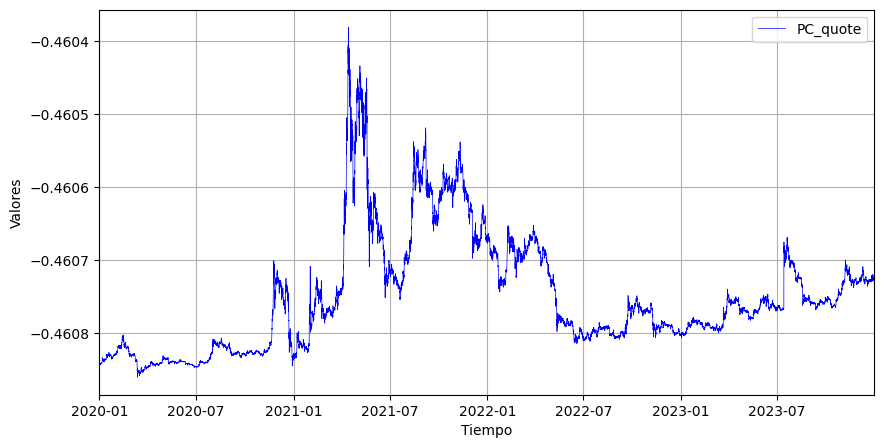

In [88]:
plt.figure(figsize=(10, 5))

plt.plot(
    df_timeserie.index, df_timeserie['target'], 
    color='blue', label='PC_quote', linewidth=0.5
    )
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-12-31'))  # Establecer la fecha de inicio y final del eje y
plt.legend()
plt.grid(True)
plt.show()

In [89]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_timeserie)

In [91]:
print(f"ADF Statistic (original): {result[0]}")
print(f"p-value (original): {result[1]}")

ADF Statistic (original): -2.6244813516801004
p-value (original): 0.08804228985997686


La serie de tiempo no es estacionaria

In [92]:
df_timeserie_diff = df_timeserie.diff().dropna()
result = adfuller(df_timeserie_diff)
print(f"ADF Statistic (diff): {result[0]}")
print(f"p-value (diff): {result[1]}")

ADF Statistic (diff): -26.221193691355417
p-value (diff): 0.0


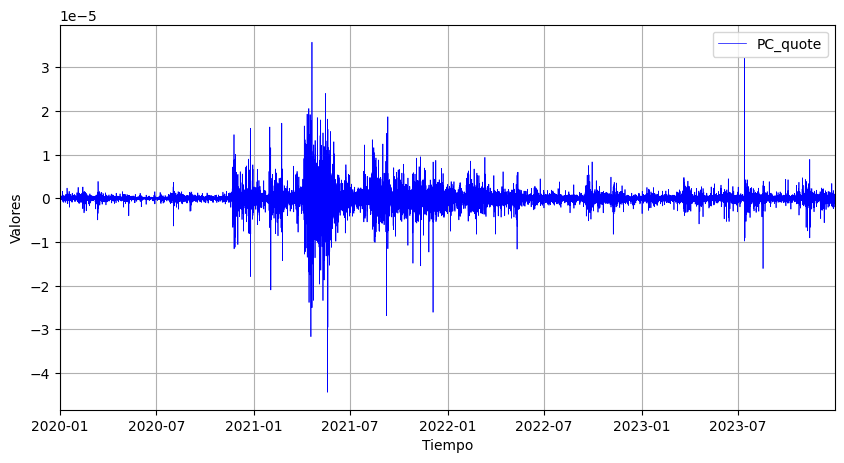

In [95]:
timeserie_plot(df_timeserie_diff)

In [103]:
def autotune_arima(df):
    result = adfuller(df)
    print("INITIAL ANALYSIS")
    print("----------------")
    print(f"ADF Statistic (diff): {result[0]}")
    print(f"p-value (diff): {result[1]}")
    df_timeserie = df
    if result[1] > 0.05:
        df_timeserie = df.diff().dropna()
    train, test = timeline_train_test_split(df_timeserie, 0.8)
    model = pm.auto_arima(train['target'], seasonal=False, trace=True)
    #model_fit = model.fit()
    start = len(train)
    end = len(train) + len(test) - 1
    predictions = model_fit.predict(start=start, end=end)#, typ='levels')
    plt.figure(figsize=(10, 4))
    plt.plot(train, label='Entrenamiento', linewidth=0.5)
    plt.plot(test, label='Prueba', linewidth=0.5)
    plt.plot(predictions, label='Predicciones', color='red', linewidth=0.5)
    plt.legend()
    plt.show()
    return model, predictions

INITIAL ANALYSIS
----------------
ADF Statistic (diff): -2.6244813516801004
p-value (diff): 0.08804228985997686
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-591247.758, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-660013.658, Time=1.92 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-593452.281, Time=1.69 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-592498.384, Time=2.00 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-591716.660, Time=2.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-605694.532, Time=7.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 19.053 seconds


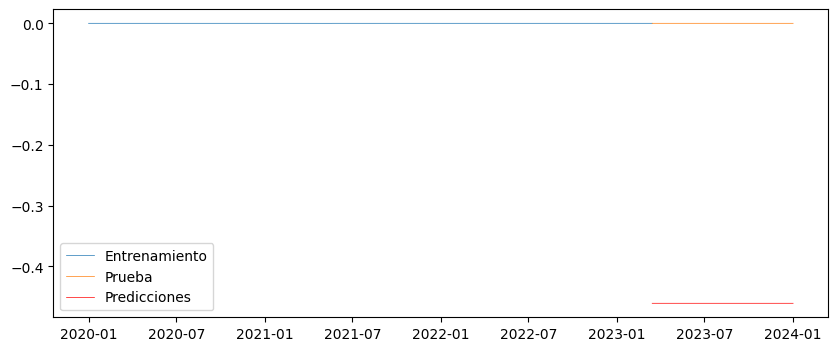

(ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 2023-03-14 18:00:00   -0.460791
 2023-03-14 19:00:00   -0.460791
 2023-03-14 20:00:00   -0.460791
 2023-03-14 21:00:00   -0.460791
 2023-03-14 22:00:00   -0.460791
                          ...   
 2023-12-31 18:00:00   -0.460791
 2023-12-31 19:00:00   -0.460791
 2023-12-31 20:00:00   -0.460791
 2023-12-31 21:00:00   -0.460791
 2023-12-31 22:00:00   -0.460791
 Freq: h, Name: predicted_mean, Length: 7013, dtype: float64)

In [104]:
autotune_arima(df_timeserie)

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end)#, typ='levels')

In [105]:
train, test = timeline_train_test_split(df_time_line, 0.8)
print(train.shape, test.shape)
model = pm.auto_arima(train['target'], seasonal=False, trace=True)
model_fit = model.fit()

(28051, 1) (7013, 1)
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-617118.940, Time=48.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-613736.259, Time=11.99 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-614295.122, Time=17.75 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-621514.319, Time=28.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-636696.904, Time=6.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-652068.956, Time=51.96 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-620883.060, Time=78.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-624525.472, Time=67.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-618094.310, Time=80.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-614506.698, Time=49.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-615582.429, Time=42.33 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 483.076 seconds


TypeError: ARIMA.fit() missing 1 required positional argument: 'y'

In [74]:
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end)#, typ='levels')

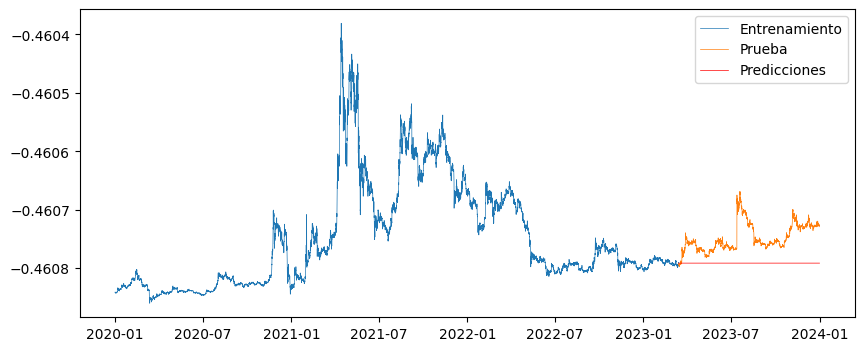

In [80]:
plt.figure(figsize=(10, 4))
plt.plot(train, label='Entrenamiento', linewidth=0.5)
plt.plot(test, label='Prueba', linewidth=0.5)
plt.plot(predictions, label='Predicciones', color='red', linewidth=0.5)
plt.legend()
plt.show()

In [81]:
model = pm.auto_arima(train['target'], seasonal=False, trace=True)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-617118.940, Time=13.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-613736.259, Time=4.91 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-614295.122, Time=6.85 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-621514.319, Time=5.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-636696.904, Time=2.57 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-652068.956, Time=9.96 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-620883.060, Time=69.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-624525.472, Time=63.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-618094.310, Time=84.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-614506.698, Time=50.42 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-615582.429, Time=43.63 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 354.066 seconds
                               SARIMAX Results                                
Dep. Variable:                    

In [83]:
predictions = model.predict(n_periods=len(test))

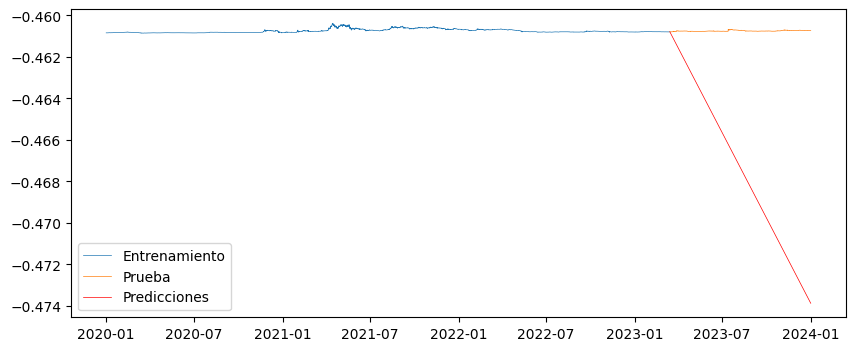

In [84]:
plt.figure(figsize=(10, 4))
plt.plot(train, label='Entrenamiento', linewidth=0.5)
plt.plot(test, label='Prueba', linewidth=0.5)
plt.plot(predictions, label='Predicciones', color='red', linewidth=0.5)
plt.legend()
plt.show()

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end)#, typ='levels')

In [ ]:
df_price = df[['open_datetime', 'PC_price']]
df_price.columns = ['date', 'target']
df_price = df_price.set_index('date')
df_price.head()

target
date                         
2020-01-01 00:00:00 -0.460841
2020-01-01 01:00:00 -0.460841
2020-01-01 02:00:00 -0.460841
2020-01-01 03:00:00 -0.460841
2020-01-01 04:00:00 -0.460841

In [ ]:
df_price = df_price.asfreq('H')

C:\Users\Cesar\AppData\Local\Temp\ipykernel_15620\1023459675.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_price = df_price.asfreq('H')


ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
type(df_price.index)
print(df_price.index.freq)

None


In [ ]:
train, test = timeline_train_test_split(df_price, 0.8)
print(train.shape, test.shape)

(504553, 1) (126138, 1)


In [ ]:
train

target
date                         
2020-01-01 00:00:00 -0.460841
2020-01-01 01:00:00 -0.460841
2020-01-01 02:00:00 -0.460841
2020-01-01 03:00:00 -0.460841
2020-01-01 04:00:00 -0.460841
...                       ...
2023-05-23 13:00:00 -0.460454
2023-05-23 14:00:00 -0.460453
2023-05-23 15:00:00 -0.460453
2023-05-23 16:00:00 -0.460455
2023-05-23 17:00:00 -0.460455

[504553 rows x 1 columns]

In [ ]:
model = ARIMA(train['target'], order=(5, 1, 0))


c:\Users\Cesar\Documents\Develop\visual\ml-tf\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Cesar\Documents\Develop\visual\ml-tf\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Cesar\Documents\Develop\visual\ml-tf\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Cesar\Documents\Develop\visual\ml-tf\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and 

In [ ]:
import pmdarima as pm

model = pm.auto_arima(train['value'], seasonal=False, trace=True)
print(model.summary())
predictions = model.predict(n_periods=len(test))
